In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pprint import pprint
from config import api_key
import numpy as np
import os
import tensorflow as tf

In [2]:
scorecard = pd.read_csv("resources/Scorecard.csv")
scorecard

C:\Users\armat\AppData\Local\Temp\ipykernel_5132\1361875663.py:1: DtypeWarning: Columns (2,7,8,9,10,20,24,25,26,27,28,29,30,31,32,33,34,35,36,100,101,102,290,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,65

,Id,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,...,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP,Year
0,1,100636,01230800,12308,COMMUNITY COLLEGE OF THE AIR FORCE,MONTGOMERY,AL,361126613,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
1,2,100654,00100200,1002,ALABAMA A & M UNIVERSITY,NORMAL,AL,35762,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
2,3,100663,00105200,1052,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,AL,352940110,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
3,4,100672,00574900,5749,ALABAMA AVIATION AND TECHNICAL COLLEGE,OZARK,AL,36360,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
4,5,100690,02503400,25034,SOUTHERN CHRISTIAN UNIVERSITY,MONTGOMERY,AL,361173553,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124694,124695,48285703,157107,1571,Georgia Military College-Columbus Campus,Columbus,GA,31909,NaN,http://columbus.gmc.cc.ga.us/,...,0.607753705815,0.490091055169,0.461751152074,0.490384615385,0.495152870992,NaN,NaN,NaN,NaN,2013
124695,124696,48285704,157101,1571,Georgia Military College-Valdosta Campus,Valdosta,GA,31605,NaN,http://valdosta.gmc.cc.ga.us/,...,0.607753705815,0.490091055169,0.461751152074,0.490384615385,0.495152870992,NaN,NaN,NaN,NaN,2013
124696,124697,48285705,157105,1571,Georgia Military College-Warner Robins Campus,Warner Robins,GA,31093,NaN,http://robins.gmc.cc.ga.us/,...,0.607753705815,0.490091055169,0.461751152074,0.490384615385,0.495152870992,NaN,NaN,NaN,NaN,2013
124697,124698,48285706,157100,1571,Georgia Military College-Online,Milledgeville,GA,31061,NaN,http://online.gmc.cc.ga.us/,...,0.607753705815,0.490091055169,0.461751152074,0.490384615385,0.495152870992,NaN,NaN,NaN,NaN,2013


In [3]:
# scorecard_reduced = scorecard[["INSTNM", "CITY", "ZIP", "NUMBRANCH", "HIGHDEG", "CONTROL", "st_fips", "region", 
#                                "ADM_RATE_ALL", "SATVRMID", "SATMTMID", "SAT_AVG", "PCIP01", 
#                                "PCIP03", "PCIP04", "PCIP05", "PCIP09", "PCIP10", "PCIP11", "PCIP12", "PCIP13", "PCIP14",
#                                "PCIP15", "PCIP16", "PCIP19", "PCIP22", "PCIP23", "PCIP24", "PCIP25", "PCIP26", "PCIP27",
#                                "PCIP29", "PCIP30", "PCIP31", "PCIP38", "PCIP39", "PCIP40", "PCIP41", "PCIP42", "PCIP43",
#                                "PCIP44", "PCIP45", "PCIP46", "PCIP47", "PCIP48", "PCIP49", "PCIP50", "PCIP51", "PCIP52",
#                                "PCIP54", "UGDS", "CURROPER", "TUITIONFEE_IN", "TUITIONFEE_OUT", "INEXPFTE", "AVGFACSAL",
#                                "C150_4", "D150_4", "CDR2", "DEBT_MDN", "CUML_DEBT_N", "INC_N", "APPL_SCH_N", "REPAY_DT_N", 
#                                "gt_25k_p10"]]

In [130]:
scorecard_cleaned = scorecard[["NUMBRANCH", "HIGHDEG", "CONTROL", "st_fips", "region", 
                               "ADM_RATE_ALL", "SATVRMID", "SATMTMID", "SAT_AVG", "UGDS", "CURROPER", "TUITIONFEE_IN", "TUITIONFEE_OUT", "INEXPFTE", "AVGFACSAL",
                               "C150_4", "D150_4", "CDR2", "DEBT_MDN", "CUML_DEBT_N", "INC_N", "APPL_SCH_N", "REPAY_DT_N", 
                               "mn_earn_wne_p6"]]

In [131]:
rep_priv = scorecard_cleaned.replace("PrivacySuppressed", "")

In [132]:
#the dataset has 25k as the "threshold earnings" and shows a percentage of people from different universities meeting the threshold, so this will be target
cardscores = rep_priv.dropna(subset=['mn_earn_wne_p6'])

In [121]:
cardscores

,ZIP,NUMBRANCH,HIGHDEG,CONTROL,st_fips,region,ADM_RATE_ALL,SATVRMID,SATMTMID,SAT_AVG,...,AVGFACSAL,C150_4,D150_4,CDR2,DEBT_MDN,CUML_DEBT_N,INC_N,APPL_SCH_N,REPAY_DT_N,mn_earn_wne_p6
46082,35762,1,Graduate degree,Public,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",0.4457,NaN,NaN,850.0,...,4991.0,0.3802,789.0,0.124,13187,2795,,2862,1986,30300
46083,35294-0110,1,Graduate degree,Public,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",0.8049,NaN,NaN,1010.0,...,6734.0,0.3857,1115.0,0.037,10500,4533,5005,5022,3733,37500
46084,36117-3553,1,Graduate degree,Private nonprofit,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,NaN,NaN,...,3043.0,NaN,NaN,0.028,10158,272,,312,235,
46085,35899,1,Graduate degree,Public,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",0.8756,575.0,570.0,1130.0,...,6257.0,0.4369,396.0,0.047,10500,1962,,1939,1435,40600
46086,36101-0271,1,Graduate degree,Public,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",0.5042,NaN,NaN,NaN,...,5017.0,0.2117,954.0,0.179,9938,3864,3295,3308,2034,25300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109092,29418,84,Non-degree-granting,Private for-profit,South Carolina,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.085,12667,48621,31416,31416,24460,44200
109093,75063,84,Non-degree-granting,Private for-profit,Texas,"Southwest (AZ, NM, OK, TX)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.085,12667,48621,31416,31416,24460,44200
109094,77079,84,Non-degree-granting,Private for-profit,Texas,"Southwest (AZ, NM, OK, TX)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.085,12667,48621,31416,31416,24460,44200
109095,77064,84,Non-degree-granting,Private for-profit,Texas,"Southwest (AZ, NM, OK, TX)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.085,12667,48621,31416,31416,24460,44200


In [122]:
cardscores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32688 entries, 46082 to 109096
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ZIP             32688 non-null  object 
 1   NUMBRANCH       32688 non-null  int64  
 2   HIGHDEG         32688 non-null  object 
 3   CONTROL         32688 non-null  object 
 4   st_fips         32687 non-null  object 
 5   region          32687 non-null  object 
 6   ADM_RATE_ALL    14487 non-null  float64
 7   SATVRMID        6243 non-null   float64
 8   SATMTMID        6292 non-null   float64
 9   SAT_AVG         7235 non-null   float64
 10  UGDS            30874 non-null  float64
 11  CURROPER        32688 non-null  object 
 12  TUITIONFEE_IN   20678 non-null  float64
 13  TUITIONFEE_OUT  20333 non-null  float64
 14  INEXPFTE        31413 non-null  float64
 15  AVGFACSAL       20707 non-null  float64
 16  C150_4          10947 non-null  float64
 17  D150_4          10947 non-null 

In [133]:
columns_to_convert = ['DEBT_MDN', 'CUML_DEBT_N', 'INC_N', 
                      'APPL_SCH_N', 'REPAY_DT_N', 'mn_earn_wne_p6']
cardscores[columns_to_convert] = cardscores[columns_to_convert].replace('', np.nan)

cardscores[columns_to_convert] = cardscores[columns_to_convert].astype(float)

C:\Users\armat\AppData\Local\Temp\ipykernel_5132\2952473305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardscores[columns_to_convert] = cardscores[columns_to_convert].replace('', np.nan)
C:\Users\armat\AppData\Local\Temp\ipykernel_5132\2952473305.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardscores[columns_to_convert] = cardscores[columns_to_convert].astype(float)


In [134]:
cardscores.columns

Index(['NUMBRANCH', 'HIGHDEG', 'CONTROL', 'st_fips', 'region', 'ADM_RATE_ALL',
       'SATVRMID', 'SATMTMID', 'SAT_AVG', 'UGDS', 'CURROPER', 'TUITIONFEE_IN',
       'TUITIONFEE_OUT', 'INEXPFTE', 'AVGFACSAL', 'C150_4', 'D150_4', 'CDR2',
       'DEBT_MDN', 'CUML_DEBT_N', 'INC_N', 'APPL_SCH_N', 'REPAY_DT_N',
       'mn_earn_wne_p6'],
      dtype='object')

In [135]:
for col in cardscores.columns:
    if cardscores[col].dtype in ['float64', 'int64']:
        mean_value = cardscores[col].mean()
        cardscores[col].fillna(mean_value, inplace=True)


C:\Users\armat\AppData\Local\Temp\ipykernel_5132\239783290.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cardscores[col].fillna(mean_value, inplace=True)
C:\Users\armat\AppData\Local\Temp\ipykernel_5132\239783290.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardscores[col].fillna(mean_value, inplace=True)


In [101]:
cardscores.to_csv("test3.csv")

In [13]:
#converting float to int here to reduce memory demands for model training
# floaters = cardscores.select_dtypes(include=['float']).columns
# float_columns = [col for col in floaters if col != "gt_25k_p10"]
# cardscores[float_columns] = cardscores[float_columns].astype(int)
# cardscores["gt_25k_p10"] = cardscores["gt_25k_p10"].astype(float)

In [14]:
cardscores.to_csv("test8.csv")

In [136]:
cardscores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32688 entries, 46082 to 109096
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NUMBRANCH       32688 non-null  int64  
 1   HIGHDEG         32688 non-null  object 
 2   CONTROL         32688 non-null  object 
 3   st_fips         32687 non-null  object 
 4   region          32687 non-null  object 
 5   ADM_RATE_ALL    32688 non-null  float64
 6   SATVRMID        32688 non-null  float64
 7   SATMTMID        32688 non-null  float64
 8   SAT_AVG         32688 non-null  float64
 9   UGDS            32688 non-null  float64
 10  CURROPER        32688 non-null  object 
 11  TUITIONFEE_IN   32688 non-null  float64
 12  TUITIONFEE_OUT  32688 non-null  float64
 13  INEXPFTE        32688 non-null  float64
 14  AVGFACSAL       32688 non-null  float64
 15  C150_4          32688 non-null  float64
 16  D150_4          32688 non-null  float64
 17  CDR2            32688 non-null 

In [137]:
# cardscores['relative_success'] = cardscores['gt_25k_p10'].apply(classify_relative_success)
cardscores.loc[:, 'relative_success'] = np.where(cardscores['mn_earn_wne_p6'] > 25000, "yes", "no")

C:\Users\armat\AppData\Local\Temp\ipykernel_5132\524859965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardscores.loc[:, 'relative_success'] = np.where(cardscores['mn_earn_wne_p6'] > 25000, "yes", "no")


In [138]:
cardscores.to_csv("cleaned_college.csv")

In [139]:
numeric_scorecard = pd.get_dummies(cardscores)
numeric_scorecard

,NUMBRANCH,ADM_RATE_ALL,SATVRMID,SATMTMID,SAT_AVG,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,INEXPFTE,AVGFACSAL,...,"region_Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)","region_Plains (IA, KS, MN, MO, NE, ND, SD)","region_Rocky Mountains (CO, ID, MT, UT, WY)","region_Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)","region_Southwest (AZ, NM, OK, TX)",region_U.S. Service Schools,CURROPER_Currently certified as operating,CURROPER_Not currently certified as an operating institution,relative_success_no,relative_success_yes
46082,1,0.445700,529.020503,532.6815,850.000000,5292.000000,3352.0,6184.000000,3470.00000,4991.000000,...,False,False,False,True,False,False,True,False,False,True
46083,1,0.804900,529.020503,532.6815,1010.000000,10381.000000,4274.0,9494.000000,14509.00000,6734.000000,...,False,False,False,True,False,False,True,False,False,True
46084,1,0.695113,529.020503,532.6815,1052.416171,336.000000,9440.0,9440.000000,3485.00000,3043.000000,...,False,False,False,True,False,False,True,False,False,True
46085,1,0.875600,575.000000,570.0000,1130.000000,4966.000000,4126.0,8702.000000,5926.00000,6257.000000,...,False,False,False,True,False,False,True,False,False,True
46086,1,0.504200,529.020503,532.6815,1052.416171,4941.000000,3600.0,7200.000000,3774.00000,5017.000000,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109092,84,0.695113,529.020503,532.6815,1052.416171,2394.568666,14805.0,12950.010672,18939.92605,5425.378761,...,False,False,False,True,False,False,True,False,False,True
109093,84,0.695113,529.020503,532.6815,1052.416171,2394.568666,14805.0,12950.010672,18939.92605,5425.378761,...,False,False,False,False,True,False,True,False,False,True
109094,84,0.695113,529.020503,532.6815,1052.416171,2394.568666,14805.0,12950.010672,18939.92605,5425.378761,...,False,False,False,False,True,False,True,False,False,True
109095,84,0.695113,529.020503,532.6815,1052.416171,2394.568666,14805.0,12950.010672,18939.92605,5425.378761,...,False,False,False,False,True,False,True,False,False,True


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

MODEL 1

In [140]:
X = numeric_scorecard.drop(columns=["relative_success_no", "relative_success_yes"], axis=1)
y = numeric_scorecard["relative_success_no"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)

In [141]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [142]:
input_features = X_train_scaled.shape[1]
hidden_nodes_1 = 30
hidden_nodes_2 = 25
hidden_nodes_3 = 15

nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units=hidden_nodes_1, input_dim = input_features, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_3, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.summary()

c:\Users\armat\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 30)             │         2,970 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 25)             │           775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,151 (16.21 KB)

 Trainable params: 4,151 (16.21 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [144]:
model = nn.fit(X_train_scaled, y_train, epochs=25)

Epoch 1/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8357 - loss: 0.3703
Epoch 2/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 0.9716 - loss: 0.0723
Epoch 3/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9813 - loss: 0.0444
Epoch 4/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9853 - loss: 0.0394
Epoch 5/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step - accuracy: 0.9852 - loss: 0.0374
Epoch 6/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9878 - loss: 0.0307
Epoch 7/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 0.9894 - loss: 0.0277
Epoch 8/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9896 - loss: 0.0323
Epoch 9/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9908 - loss: 0.0231
Epoch 10/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - accuracy: 0.9904 - loss: 0.0245
Epoch 11/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9910 - loss: 0.0251
Epoch 12/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [145]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

256/256 - 0s - 1ms/step - accuracy: 0.9901 - loss: 0.0248
Loss: 0.024760765954852104, Accuracy: 0.9900881052017212


Model 2: Checking for data leakage

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [147]:
lin_regress = LinearRegression()
sample = numeric_scorecard.sample(frac=0.3, random_state=42)
X = sample.drop(columns=["relative_success_no", "relative_success_yes"], axis=1)
y = sample["relative_success_no"]

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

In [149]:
lin_regress.fit(X_train, y_train)

LinearRegression()

In [150]:
y_pred = lin_regress.predict(X_test)

In [151]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.11
R-squared: 0.43


In [152]:
me = mse ** .5
print(me)

0.324871185743705


0.1 7546763809.27
0.15 12162.83
0.2 60957.76
0.25 30057.25
0.3 215525769.29

Text(0.5, 1.0, 'Mean Squared Error For Different Fractions of the Dataset')

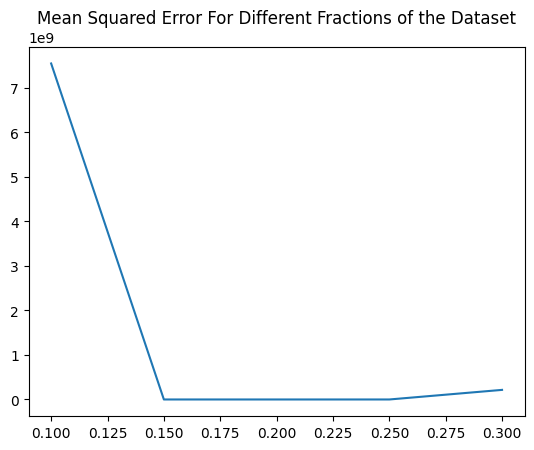

In [81]:
sample_size = [0.1, 0.15, 0.2, 0.25, 0.3]
mse = [7546763809.27, 12162.83, 60957.76, 30057.25, 215525769.29]
plt.plot(sample_size, mse)
plt.title('Mean Squared Error For Different Fractions of the Dataset')

Random Forest Model